In [1]:
'''
  Reference : https://github.com/graykode/nlp-tutorial
'''
import tensorflow as tf
import numpy as np

## 데이터 준비

In [7]:
# 3 Words Sentence
sentences = [ "i like dog", 
              "i like cat", 
              "i like animal",
              "dog cat animal", 
              "apple cat dog like", 
              "dog fish milk like",
              "dog cat eyes like", 
              "i like apple", 
              "apple i hate",
              "apple i movie book music like", 
              "cat dog hate", 
              "cat dog like"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

# Word2Vec Parameter
batch_size = 20
embedding_size = 2 # To show 2 dim embedding graph
voc_size = len(word_list)

def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]]) # target
        random_labels.append(np.eye(voc_size)[data[i][1]]) # target word
        
    return random_inputs, random_labels

# one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
    
    for w in context:
        skip_grams.append([target, w])

## 모델 구성

In [21]:
inputs = tf.placeholder(tf.float32, shape=[None,voc_size])
labels = tf.placeholder(tf.float32, shape=[None,voc_size])

# W and WT is not transpose relationship
W = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
WT = tf.Variable(tf.random_uniform([embedding_size, voc_size], -1.0, 1.0))

hidden_layer = tf.matmul(inputs, W) # [batch_size, embedding_size]
output_layer = tf.matmul(hidden_layer, WT) # [batch_size, voc_size]

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels=labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

## 모델 훈련

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(10000):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})

        if (epoch) % 1000 == 0:
            print('Epoch :', '%04d' % (epoch ), 'cost = ', '{:.4f}'.format(loss))

        trained_embeddings = W.eval()                                                      

Epoch : 0000 cost =  2.8781
Epoch : 1000 cost =  2.3723
Epoch : 2000 cost =  2.0724
Epoch : 3000 cost =  2.0011
Epoch : 4000 cost =  1.7358
Epoch : 5000 cost =  1.7160
Epoch : 6000 cost =  1.8743
Epoch : 7000 cost =  1.8137
Epoch : 8000 cost =  1.9436
Epoch : 9000 cost =  1.7661


## 결과 확인

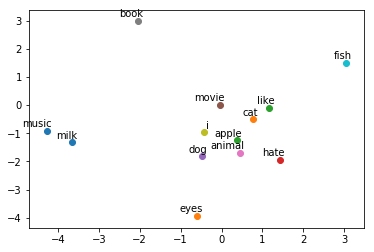

In [25]:
import matplotlib.pyplot as plt
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x,y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()    